# Using Python to study the spontaneous symmetry breaking in $\phi^4$ theory on a lattice

In this presentation, I want to introduce a possible way of applying Python in the study of lattice QCD. Lattice simulations of a quantum field theory with a non-Abelian gauge group are done commonly done employing a particular algorithm, called "Hybrid Monte Carlo". This algorithm is very involved and it is being continuously changed, especially for improvements in efficiency. The simulations are better done by employing programs which are written in C, with some SSE/SSE2 instructions to achieve a better control on some very expensive linear algebra operations. These simulations are also usually parallized for efficiency and they are run on some of the most powerful supercomputers available. The main idea here is not to run those simulations through Python, but to use this tool to analyze the data extracted from them.

In order to make the discussion as clear as possible, I will describe a simulation of a simpler theory, which I was able to run on my laptop (processor: 2,7 GHz Intel Core i5 dual-core, memory: 8 GB 1867 MHz DDR3). In particular, the case study here is the spontaneous symmetry breaking in a scalar $\phi^4$ theory.

## The scalar $\phi^4$ theory on a lattice

As it is usually done in numerical simulations, we want to study the Euclidean version of the theory employing the path integral formalism. The theory is set on a $(d+1)$-dimensional cubic lattice $\Lambda$ with finite lattice spacing $a$ and volume $V$.
After rescaling, the easiest discretization of the $\mathbb{Z}_2$ invariant Euclidean action will be of the form
$$
S^E[\phi] = \sum_{x\in\Lambda} \left\{ -2\kappa \sum_{\mu=0}^d \phi(x) \phi(x+\hat\mu a) + \phi^2(x) + \lambda[\phi^2(x)-1]^2 \right\},
$$
while the expectation value of an observable $\hat {\mathcal O}$ is given by
$$
\langle \hat {\mathcal O} \rangle = \frac{1}{Z_a} \int \mathcal{D}\phi \, e^{-S^E(\phi)} \mathcal{O}(\phi(x)),
$$
where $Z_a = \langle 1 \rangle$ is the partition function of the theory and $\frac{e^{-S^E(\phi)}}{Z_a}$ is a probability distribution. It will be useful to define the following observables:
- magnetization: $$ m = \frac{1}{V}\langle M \rangle, M = \sum_{x\in\Lambda} \phi(x) $$
- absolute magnetization: $$ |m| = \frac{1}{V}\langle |M| \rangle $$
- quadratic magnetization: $$ m^2 = \frac{1}{V} \langle M^2 \rangle $$
- susceptibility: $$ \chi = \frac{1}{V} (\langle M^2 \rangle - \langle |M| \rangle ^2) $$
- Binder cumulant: $$ B = \frac{\langle M^4 \rangle}{\langle M^2 \rangle^2} $$


As it has been previously noted, the simulations are run with a C program. In the scalar case, it will be way easy to run simulations on local machines. The general idea is to generate a set of configurations of the field $\phi(x)$ on the lattice which follow the above probability distribution. In order to do so, a Markov chain is suitably employed through the HMC algorithm and data are collected in .txt files. Here, we are not interested in the details of the implementation of the simulations, so we skip a more thorough description. It is important to note that a good Markov chain
- is able to quickly thermalize, i.e. we can start from any random field configuration and achieve the generation of field configurations following the required distributions after a few thermalization steps;
- has a high acceptance rate and a low computational cost (each new configuration is accepted with a given probability in order to correct for numerical approximations that are done in the simulations);
- has no autocorrelation.

For the following discussion, we will consider $N$ measurements $\mathcal{O}_i$ that correspond to $N$ equilibrium configurations $\phi_i$of the field, i.e. $\mathcal{O}_i = \mathcal{O}(\phi_i)$. Then, the expectation value of the observable $\langle \mathcal{O} \rangle$ is equal to its mean $\langle \mathcal{O}_i \rangle$ over $N$ configurations (eventually removing the first ones in case thermalization is not achieved at the beginning of the $N$ measurements), the mean being ideally taken over an infinite set of Markov chains with different initial configurations and random number sequences.

## Autocorrelation function

If the measurements are not correlated, i.e. if
$$
\langle \mathcal{O}_i \mathcal{O}_j \rangle = \langle \mathcal{O}_i \rangle \langle \mathcal{O}_j \rangle = \langle \mathcal{O} \rangle ^2, \, i \neq j,
$$
it is possible to construct an estimator for the mean
$$
\bar{\mathcal{O}} = \frac{1}{N} \sum_{i=1}^N \mathcal{O}_i, \, \langle \bar{\mathcal{O}} \rangle = \langle \mathcal{O} \rangle
$$
and its error
$$
\sigma_{\bar{\mathcal{O}}}^2 = \frac{\sigma_{\mathcal{O}}^2}{N}, \, \Delta_{\bar{\mathcal{O}}}^2 = \frac{1}{N(N-1)} \sum_{i=1}^N (\mathcal{O}_i - \bar{\mathcal{O}})^2, \, \langle \Delta_{\bar{\mathcal{O}}}^2 \rangle = \sigma_{\bar{\mathcal{O}}}^2.
$$
On the other hand, if the measurements are correlated, it is useful to introduce the autocorrelation function
$$
\Gamma_{\mathcal{O}}(t) = \langle \mathcal{O}_i \mathcal{O}_{i+t} \rangle - \langle \mathcal{O}^2 \rangle^2
$$
with the corresponding estimator
$$
\bar\Gamma_{\mathcal{O}}(t) = \frac{1}{N-t} \sum_{i=1}^{N-t} (\mathcal{O}_i-\bar{\mathcal{O}})(\mathcal{O}_{i+t}-\bar{\mathcal{O}})
$$
such that now
$$
\sigma_{\bar{\mathcal{O}}}^2 = \frac{\sigma_{\mathcal{O}}^2}{N} 2 \tau_{int}^{\mathcal{O}}, \, \tau_{int}^{\mathcal{O}} = \frac{1}{2} \left[ 1 + 2\sum_{t=1}^{N-1} \frac{\Gamma_{\mathcal{O}}(t)}{\Gamma_{\mathcal{O}}(0)} \right]
$$
with the corresponding estimator
$$
\Delta_{\bar{\mathcal{O}}}^2 = \frac{\Delta_{\mathcal{O}}^2}{N} \, 2 \, \bar{\tau}_{int}^{\mathcal{O}}, \, \bar{\tau}_{int}^{\mathcal{O}} = \frac{1}{2} \left[ 1 + 2\sum_{t=1}^{N-1} \frac{\bar\Gamma_{\mathcal{O}}(t)}{\bar\Gamma_{\mathcal{O}}(0)} \right].
$$
In this sense, the quantity $2 \, \bar{\tau}_{int}^{\mathcal{O}}$ can be interpreted as a correction to the error estimate in the case without autocorrelation between data, where $2 \, \bar{\tau}_{int}^{\mathcal{O}} = 1$. In general, $2 \, \bar{\tau}_{int}^{\mathcal{O}} > 1$ has the effect of effectively reducing the number of independent measurements being considered. \
In case the $N$ measurements are not correlated, it is easy to proceed in the analysis. This can be achieved by either measuring once every $2 \, \bar{\tau}_{int}^{\mathcal{O}}$ steps ("__skipping__") or through __binning__. Next, we will describe the latter, but it is also possible to take autocorrelation exactly into account and an efficient method to do so will be described later.

Before going on, we show a simple plot of the autocorrelation functions for the observables that have been previously introduced.

In [1]:
from autocorrPlot import autocorrPlot

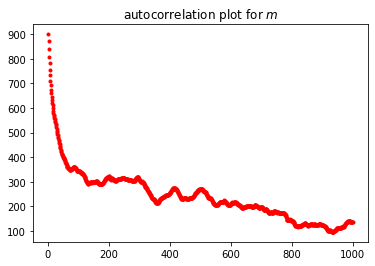

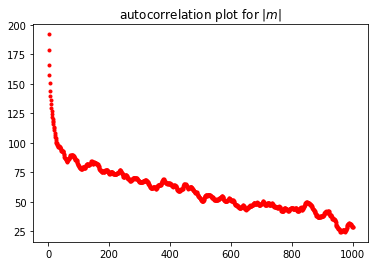

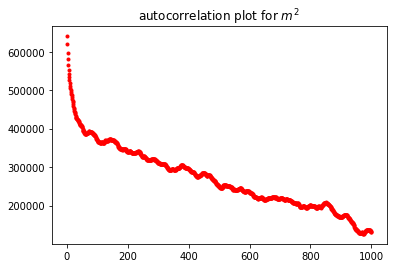

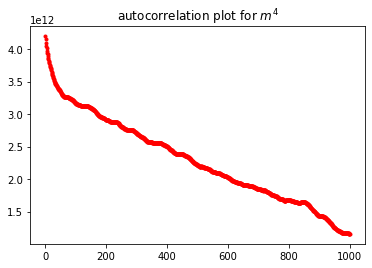

In [2]:
autocorrPlot()

### The binning method

The binning procedure relies on measuring $\mathcal{O}_i$ as averages over an interval with length $B\simeq 2 \, \bar{\tau}_{int}^{\mathcal{O}}$. Intuitively, it is possible to estimate $B$ by observing the dependence of the observable on the length of the bin and checking where it becomes negligible.\
More in particular, it is possible to group $N \times B$ measurements $\mathcal{O}_i$ in $N$ measurements given by averages being done once every $B$ steps, i.e.
$$
\mathcal{O}_k^B = \frac{1}{B} \sum_{i=1}^B \mathcal{O}_{(k-1)B+i}, \, k = 1,\cdots,N.
$$
If $B \geq 2 \, \bar{\tau}_{int}^{\mathcal{O}}$, the measurements $\mathcal{O}_1^B, \cdots, \mathcal{O}_N^B$ are not expected to be correlated.

### The $\Gamma$ method

The method is described in U. Wolff, Monte Carlo errors with less errors, https://arxiv.org/pdf/hep-lat/0306017.pdf, where a MATLAB package called __UWerrTexp__ was provided. Here, we will briefly summarize the results of the paper and "translate" the package in python, in order to use it to analyze our data.\
The $\Gamma$ method is designed to explicitly compute the value of $\bar\tau^{\mathcal{O}}_{int}$ as the integral of the autocorrelation function in order to exactly correct for autocorrelation in our data. It is possible to prove that the autocorrelation funtion in exponentially decreasing at large markovian time $t$, i.e.
$$
\Gamma(t) \propto \exp{(-t/\tau)}
$$
for a proper finite time scale $\tau$. Intuitively, it is possible to define an upper bound $t=W$ for the computation of the integral and estimate the error of this truncation by computing the integral of the exponentially decaying tail. In particular, the systematic error has the form $\exp{(-W/\tau)}$, while the statistical error goes like $2\sqrt{W/N}$. In the program, we compute the optimal value $W_{optimal}$ for $W$ that minimizes the absolute value of the sum of these two contributions to the error.\
The quantity $2W_{optimal}$ has a similar meaning of the bin length $B$ in the binning procedure, where the systematic error scales like $\tau/B$, while the statistical error goes like $\sqrt{2B/N}$. Also for this case it is possible to balance these two contributions and find the optimal bin length.\
The $\Gamma$ method is expected to be more advantageous because of the exponentially decreasing systematic error, which allows us to obtain a better estimator for the error of the error.\
The package can be found in UWerrTexp.py. The code is very involved, so we will not copy it below, but it can be analyzed separately.

In [3]:
from UWerrTexp import UWerrTexp

### The jackknife method

Now we are ready to analyze our data. Let's suppose that the $N$ measurements are not correlated. We want to estimate $F(\langle a \rangle, \langle b \rangle, \cdots)$, where $a$, $b$, $\cdots$ are primary observables (such as $m$, $|m|$, $m^2$, $m^4$). If we define
$$
\bar a = \frac{1}{N} \sum_{i=1}^N a_i, \, \bar b = \frac{1}{N} \sum_{i=1}^N b_i
$$
the central limit theorem tells us that
$$
\bar a = \langle a \rangle + O(\frac{1}{\sqrt{N}}), \, \bar b = \langle b \rangle + O(\frac{1}{\sqrt{N}}).
$$
Hence
$$
\bar F = F(\bar a, \bar b) = F(\langle a \rangle, \langle b \rangle) + \left( \frac{\partial F}{\partial a} \right)_{\langle a \rangle, \langle b \rangle} (\bar a - \langle a \rangle) + \left( \frac{\partial F}{\partial b} \right)_{\langle a \rangle, \langle b \rangle} (\bar b - \langle b \rangle) + O(\frac{1}{N})
$$
and
$$
\sigma_{\bar F}^2 = \left[ \left( \frac{\partial F}{\partial a} \right)_{\langle a \rangle, \langle b \rangle} \right]^2 \sigma_{\bar a}^2 + \left[ \left( \frac{\partial F}{\partial b} \right)_{\langle a \rangle, \langle b \rangle} \right]^2 \sigma_{\bar b}^2 + 2 \left[ \left( \frac{\partial F}{\partial a} \right) \left( \frac{\partial F}{\partial b} \right) \right]_{\langle a \rangle, \langle b \rangle} cov(\bar a, \bar b),
$$
where
$$
cov(\bar a, \bar b) = \langle (\bar a - \langle a \rangle) (\bar b - \langle b \rangle) \rangle.
$$
This method is not practical to implement for very involved functions of primary observables. Therefore, we propose here an alternative procedure, i.e. the **jackknife method**.\
For the primary observables, first we need to introduce the jackknife variables
$$
a_k^J = \frac{1}{N-1} \sum_{i=1,i\neq k}^N a_i = \bar a - \frac{a_k - \bar a}{N-1}
$$
such that
$$
\bar a^J = \bar a, \, [\Delta_{\bar a}^J]^2 = \frac{N-1}{N} \sum_{k=1}^N (a_k^J - \bar a^J)^2 = \Delta_{\bar a}^2,
$$
i.e. it is possible to compute their average and error to obtain the respective values for primary observables.\
Such a result holds for secondary variables too, where $F_k^J = F(a_k^J)$ and
$$
\bar F^J = F(\bar a^J) = F(\bar a) = \bar F, \, [\Delta_{\bar F}^J]^2 = \frac{N-1}{N} \sum_{k=1}^N (F_k^J - \bar F^J)^2 = \Delta_{\bar F}^2.
$$
This method is easily generalizable to secondary observables that depend on more variables and allows us to easily compute the errors of compound functions.\
We have included this method in the package **analyze.py**.

## First examples of data analysis

In order to analyze data, I have also written some routines to do a fit using the SVD decomposition (taking ispiration from some routines I already had written in MATLAB).

In [4]:
from svdfit import svdfit
from svdpolyval import svdpolyval

We are now ready to analyze data.

In [5]:
from analyze import analyze

In [6]:
help(analyze)

Help on function analyze in module analyze:

analyze(nameFolder='0', wantchecks=0, wantkexact=0)
     ANALYZE
     Analizziamo i dati raccolti con simulazione.c a valori di kappa e L, V
     variabili. In particolare, le simulazioni sono state fatte con
     lambda = 1.145; D = 3;  ntraj = 1000000; ntherm = 10000; naccu = 10000;
     k = {0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23}
     L/a = {4,6,8,10,12,14,16}
     I dati sono presenti nei vari file 'simulazioneL#' dentro le cartelle
     nella presente directory, che possono essere chiamate in modo esplicito, 
     e sono così distribuiti:
    - su cinque colonne: conteggio, <M>, <|M|>, <M^2>, <M^4>;
    - in nove blocchi, ognuno a k fissato e ognuno contente un numero di
        misure (ciascuna è una media ogni naccu) pari a ntraj/naccu;
    - per ogni file, L è fissato (dal valore '#' nel nome).
    
    Esempi di chiamate:
    analyze % senza check, usando i file nella cartella naccu = 1000
    analyze("naccu = 10000/",1) % co

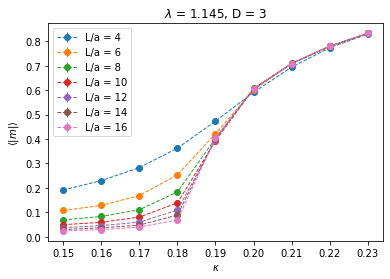

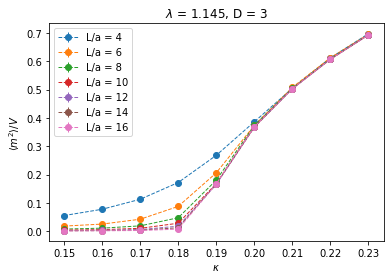

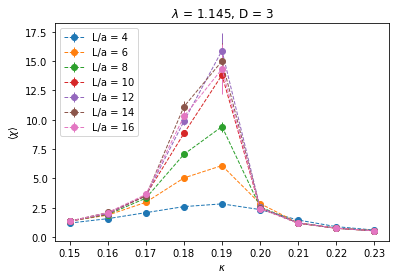

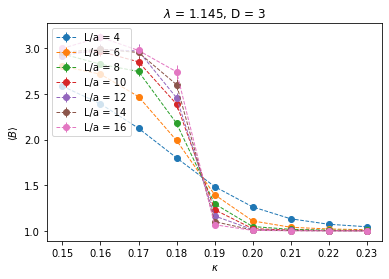

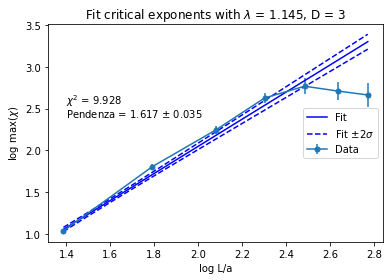

In [7]:
analyze()

The above plots show various plots of the measurements of the observables that were defined at the beginning of this discussion for different simulation parameters (i.e. at different values of $\kappa$ and $L$). The last plot will be better discussed below.

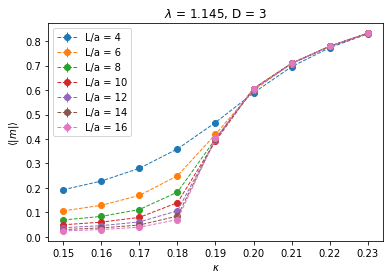

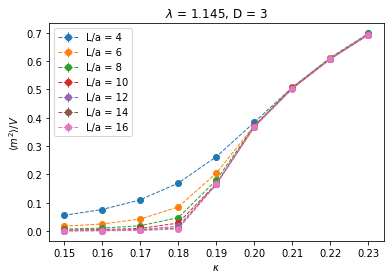

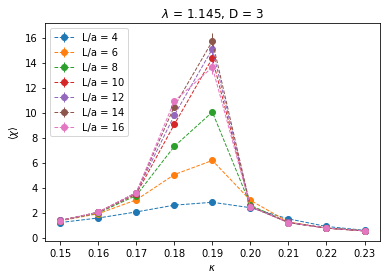

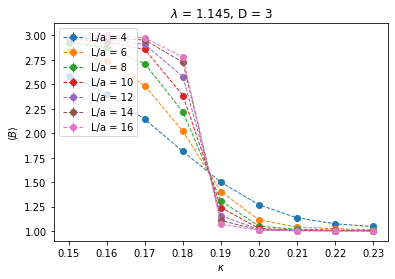

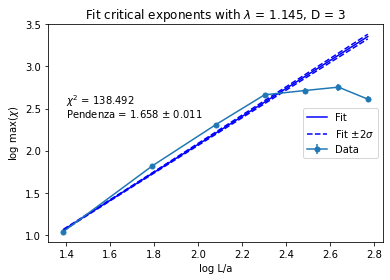

In [8]:
analyze("naccu = 10000/",1)

Here we used different input data. Apart from that, the difference in the ouput, in this case, is not immediatly clear. Though, the tile checkFile.txt was generated, and it includes different comments on checks for the available data.

In [9]:
lines = []
with open('checkFile.txt') as f:
    lines = f.readlines()
for line in lines:
    print(line) 

Controllo su tauint > 0.5 entro 2 sigma.

Fine controllo su tauint



Le medie differiscono per 4.4218164596300046e-12



Controllo su errori compatibili entro 2 sigma.

[[1.94299247e-04 2.49443412e-04 3.39457615e-04 3.45304959e-04

 5.17526180e-04 4.78387597e-04 1.71235020e-04 1.80729656e-04

 1.37675674e-04 6.39261305e-05 1.93444795e-04 1.58969644e-04

 3.06734092e-04 4.89172244e-04 3.65569981e-04 1.10095023e-04

 4.85649013e-05 6.26500310e-05 9.09231552e-05 1.30962670e-04

 1.14090072e-04 3.86362900e-04 6.10286021e-04 9.98450322e-05

 6.98906617e-05 6.16012428e-05 3.41402769e-05 5.47415777e-05

 6.51931705e-05 1.27884845e-04 4.43868770e-04 7.00149767e-04

 1.22904615e-04 5.79025168e-05 4.08981165e-05 3.63433791e-05

 6.68475474e-05 7.07260426e-05 3.08693526e-04 6.42565880e-04

 9.02896925e-05 4.28919822e-05 2.77188321e-05 1.17854584e-05

 3.35035655e-05 2.94829463e-05 1.01785691e-04 2.17981959e-04

 2.43272690e-04 6.89828125e-05 3.60133202e-05 1.56801172e-05

 1.41722250e-05 1.31759

## The critical exponent

By observing the behaviour of the observables as a function of $\kappa$, it is possible to identify an interval that includes the crical value $\kappa = \kappa_c$ at which the phase transition happens. We will refer to the above plots.
- It is clear that the phase transition for $|m|$ and $m^2$ is manifested by the presence of an inflection point. It is possible to notice that, for increasing values for $\kappa > \kappa_c$, the dependence on the volume seems to be less and less important.
- The observable $\chi$ has a clear cusp at $\kappa = \kappa_c$. We will further describe this behaviour below.
- In the plot for the observable $B$, instead, $\kappa = \kappa_c$ should be a point of intersection for all the lines at different volumes. As the volume increases, $B$ seems to tend to form a step function with the values $3$ for $\kappa < \kappa_c$ and $1$ for $\kappa > \kappa_c$. The value $B = 1$ can be easily understood by noticing that for a gaussian theory (i.e. with a quadratic action in $\phi$) it holds that $\langle \phi^4 \rangle = \langle \phi^2 \rangle \langle \phi^2 \rangle$. Deviations from $B = 1$ show a deviation of the theory from the gaussian behaviour.

In the previous plots, we have sampled the values of $\kappa$ in the interval $(0.15,0.23)$ with step-size $0.01$. The results for all the observables agree with each other and lead to
$$ \kappa_c \in (0.18,0.19). $$
The fact that this value is found to be independent of the observable should not come as a surprise: $\kappa_c$ is the value of the bare mass at which the renormalized mass vanishes. There is no physical reason that might lead us to believe that the phase transition, i.e. the spontaneous symmetry breaking of the theory, was observable-dependent.

We will now further discuss the behaviour of the susceptibility $\chi$. A finite-size scaling effect is given by
$$ \max{\chi} \propto \left( \frac{L}{a} \right)^{\gamma/\nu}, $$
where $\gamma$ is a fundamental parameter of the theory. The fact that this relation holds at finite volume is a signal of the presence of the phase transition. A conjecture also states that the critical exponents (here, $\gamma$ and $\nu$) do not depend on the dimensionality of the theory, but only on its symmetries.\
We can attempt to verify whether this relation holds. It is useful to rewrite is as
$$ \log[\max{\chi}] = \left( \frac{\gamma}{\nu} \right) \log \left(\frac{L}{a} \right) + C, $$
where $C$ is a constant. From the previous plots, it is clear that the maximum value of $\chi$ is reached at $\kappa = 0.19$, and the last plot in the previous outputs represents the linear fit at this value of $\kappa$. We will refer to those plots without reproducing them again here.\
It is evident that the linear relation seems to hold for the smallest values of $L$, while there is a deviation at larger volumes. This is due to the fact that the real values $\kappa_c \in (0.18,0.19)$.\
We can experiment a little bit and find that a more interesting value to study is $\kappa = 0.188$, for which we can run again the python routine (once we have generated the corresponding data, of course).

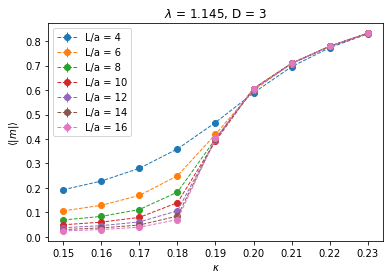

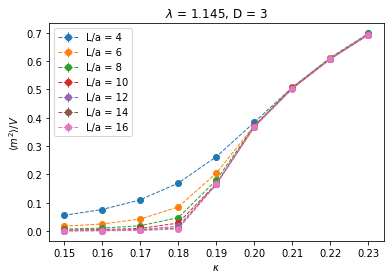

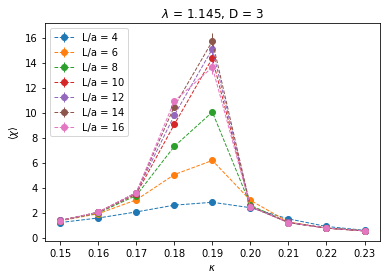

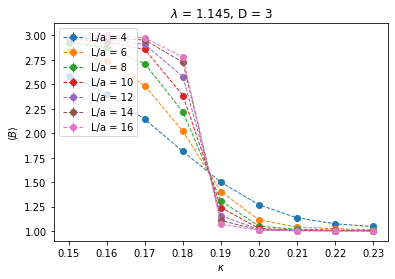

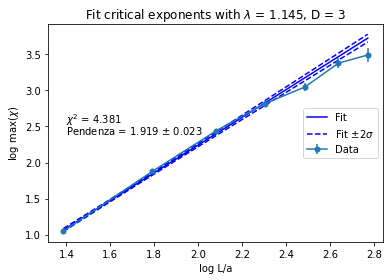

In [10]:
analyze("naccu = 10000/",0,1)

It is clear that these results are better than the previous ones, even if they are still not completely satisfactory. This means that we should keep on varying the value of $\kappa$ to find a better estimate of $\kappa_c$ by looking at the plot of $\max{\chi}$ as a function of $L$.

It is finally possible to discuss the problem of identifying the order of the phase transition.\
If $Z$ is the partition function of the theory, the free energy is defined as $F = -\log{Z}$. In general, $F$ is a function of a parameter and a phase transition is identified by the presence of a discontinuity in either $F$ or its derivatives with respect to this parameter. The phase transition is of the first order if the first derivative of $F$ happens to be discontinuous (but finite, i.e. it has a "jump"), while it is of the second order if a higher derivative is singular in the transition point. For instance, in a classical system the partition function is defined as $Z = \sum_i e^{-\beta E_i}$, where $E_i$ is the energy of the $i$-th state, and the parameter with respect to which we derive $F$ is $\beta = (k_B T)^{-1}$.\
In our case, i.e. the $\phi^4$ theory, the partition function is given by
$$ Z = \int \mathcal{D}\phi \, e^{-S(\phi)}, \, \mathcal{D}\phi = \prod_{x\in\Lambda} d\phi(x). $$
Since we have been studying the theory at constant $\lambda$ and with varying $\kappa$, $S(\phi)$ is a function of $\kappa$ too. The free energy is then given by
$$ e^{-F(\theta)} = \frac{1}{Z} \int \mathcal{D}\phi \, e^{-S(\phi)} e^{i\theta M} = \langle e^{i \theta M} \rangle = \frac{Z(\theta)}{Z(0)}, $$
where $Z = Z(0)$ and $M = \sum_{x\in\Lambda}\phi(x)$. Hence,
$$ F(\theta) = -\log{\frac{Z(\theta)}{Z(0)}}. $$
We can observe that the term $i\theta M$ explicitly breaks the $\mathbb{Z}_2$ symmetry of the theory if $\theta \neq 0$. It is important to note that $\theta$ is a useful auxiliary variable that does not appear in the initial physical action. Therefore, all the physical observables will not depend on it.\
It is possible to define the susceptibility as
$$ \chi = \frac{1}{V} \left( \frac{d^2}{d\theta^2}\, F(\theta) \right)_{\theta=0} $$
which is equal to the previous definition we provided as $\chi = \frac{1}{V} (\langle M^2 \rangle - \langle |M| \rangle^2)$. In this way, it has been possible to define the susceptibility as the second derivative of $F$ with respect to a parameter $\theta$. It is clear that $\chi$ does not depend on this parameter any more, since the derivative in its definition is evaluated at $\theta = 0$, while it is still a function of $\kappa$. It is then possible to study $\chi$ as a function of $\kappa$ to extract information on the order of the phase transition. In particular, from the previous plots it is clear that $\chi$ has a cusp in $\kappa = \kappa_c$, i.e. it is continuous with a singular derivative in this point. For this reason, the phase transition is of **second order**.\
A final interesting remark can be done here. By considering the analogy between critical points and fixed points of the renormalization group (i.e. scale invariant points which are independent of the choice of the renormalization conditions; they only depend on the dimensionality and the symmetries of a theory), it is easier to understand why the critical point $\kappa_c$ at which the phase transition happens is unique and seems to be universal, i.e. independent of renormalization conditions and the choice of the observable to measure it.

## Final remarks

Here we have provided a short presentation on a possible application of python to do the analysis of data from numerical simulations of a lattice field theory. For simplicity reasons, I have decided to present the $\phi^4$ theory on a lattice.\
We have assessed the problem of the presence of a possible autocorrelation between the measurements and we have tackled it in two different ways, i.e. by _binning_ or by using the package UWerrTexp. The latter implements the $\Gamma$ method that allows us to exactly correct the error computed by assuming complete absence of autocorrelation between data.\
We have then been able to study the spontaneous symmetry breaking of the theory by analyzing finite-size scaling effects, i.e. studying it as the phase transition of a classical system. In this way, we have been able to indetify a range of values of $\kappa$ in which the phase transition happens. By studying the behaviour of $\max{\chi}$ as a function of the lattice size, we obtainted a better estimate of $\kappa_c$. Finally, we identified the order of the phase transition.\
The ultimate goal is to employ these relatively simple results for the data analysis of full lattice QCD.